In [1]:
# HW: San Francisco Airport Clustering

In [27]:
#!pip install yellowbrick
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [28]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')

In [31]:
df.sample(100)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
7358,201010,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Deplaned,Other,International,A,8389
6452,201002,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,Terminal 1,C,6001
10383,201212,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,International,A,8002
13608,201504,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,Terminal 3,F,11070
16044,201611,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Deplaned,Low Fare,Terminal 1,B,160193
...,...,...,...,...,...,...,...,...,...,...,...,...
4539,200809,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Low Fare,Terminal 3,F,38666
14800,201602,Compass Airlines,CP,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 2,D,9497
14640,201601,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,G,26814
16293,201701,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,8673


In [32]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [33]:
#missing_col = 'Operating Airline IATA Code'

#test_indices = df[df[missing_col].isnull()].index
#df_empty_rows = df.loc[test_indices]
#df_empty_rows

In [ ]:
# fill in empty rows appropriately

In [34]:
# filling empty columns
# Servisair
df['Operating Airline IATA Code'] = np.where((df['Operating Airline'] == 'Servisair') & (df['Operating Airline IATA Code'].isnull() ) ,
                                             'SA', df['Operating Airline IATA Code'] ) 

df['Published Airline IATA Code'] = np.where((df['Operating Airline'] == 'Servisair') & (df['Published Airline IATA Code'].isnull() ) ,
                                             'SA', df['Published Airline IATA Code'] ) 

#Swissport USA
df['Operating Airline IATA Code'] = np.where((df['Operating Airline'] == 'Swissport USA') & (df['Operating Airline IATA Code'].isnull() ) ,
                                             'SU', df['Operating Airline IATA Code'] ) 

df['Published Airline IATA Code'] = np.where((df['Operating Airline'] == 'Swissport USA') & (df['Published Airline IATA Code'].isnull() ) ,
                                             'SU', df['Published Airline IATA Code'] ) 

#Boeing Company
df['Operating Airline IATA Code'] = np.where((df['Operating Airline'] == 'Boeing Company') & (df['Operating Airline IATA Code'].isnull() ) ,
                                             'BC', df['Operating Airline IATA Code'] ) 

df['Published Airline IATA Code'] = np.where((df['Operating Airline'] == 'Boeing Company') & (df['Published Airline IATA Code'].isnull() ) ,
                                             'BC', df['Published Airline IATA Code'] ) 

#Pasific Aviation
df['Operating Airline IATA Code'] = np.where((df['Operating Airline'] == 'Pacific Aviation') & (df['Operating Airline IATA Code'].isnull() ) ,
                                             'PAV', df['Operating Airline IATA Code'] ) 

df['Published Airline IATA Code'] = np.where((df['Operating Airline'] == 'Pacific Aviation') & (df['Published Airline IATA Code'].isnull() ) ,
                                             'PAV', df['Published Airline IATA Code'] ) 


#Pasific Aviation
df['Operating Airline IATA Code'] = np.where((df['Operating Airline'] == 'Trego Dugan Aviation') & (df['Operating Airline IATA Code'].isnull() ) ,
                                             'TDA', df['Operating Airline IATA Code'] ) 

df['Published Airline IATA Code'] = np.where((df['Operating Airline'] == 'Trego Dugan Aviation') & (df['Published Airline IATA Code'].isnull() ) ,
                                             'TDA', df['Published Airline IATA Code'] ) 

In [35]:
df = df [ ['Activity Period' , 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'] ]

In [36]:
#tekar eden  sutunlari silmek icin
#df = df.loc[:,~df.apply(lambda x: x.duplicated(), axis=1).all()].copy()    

In [37]:
#dummy_df = pd.get_dummies(df["Terminal"], prefix="Terminal", drop_first=True)
#df = pd.concat([df, dummy_df], axis=1)
#df = df.drop('Terminal', axis=1)

In [38]:
#df['Boarding Area'].unique()

In [39]:
#dummy_df = pd.get_dummies(df["Boarding Area"], prefix="Boarding Area", drop_first=True)
#df = pd.concat([df, dummy_df], axis=1)
#df = df.drop('Boarding Area', axis=1)

In [40]:
#len(df.columns)

In [41]:
df['Activity Period'] = df['Activity Period'].astype('category')
dummy_df = pd.get_dummies(df['Activity Period'], prefix='Activity Period', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Activity Period', axis=1)


In [42]:
dummy_df = pd.get_dummies(df['GEO Summary'], prefix='GEO Summary', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('GEO Summary', axis=1)

In [43]:

dummy_df = pd.get_dummies(df['GEO Region'], prefix='GEO Region', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('GEO Region', axis=1)



In [44]:
dummy_df = pd.get_dummies(df['Activity Type Code'], prefix='Activity Type Code', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Activity Type Code', axis=1)



In [45]:
dummy_df = pd.get_dummies(df['Price Category Code'], prefix='Price Category Code', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Price Category Code', axis=1)



In [46]:
dummy_df = pd.get_dummies(df['Terminal'], prefix='Terminal', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Terminal', axis=1)



In [47]:
dummy_df = pd.get_dummies(df['Boarding Area'], prefix='Boarding Area', drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Boarding Area', axis=1)

In [53]:
x = df

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd
import matplotlib.pyplot as plt

# pembe uyarilardan kurtulmak icin: 
import warnings
warnings.filterwarnings("ignore")

In [55]:
allscore= []
allclusters = []
distances = []
def clust(kactane):
    for i in range(1,kactane):
        i = i+1
        model   = KMeans(i)
        model   = model.fit(x)
        tahmin  = model.predict(x)
        score   = silhouette_score(x,tahmin)
        distance = model.inertia_
        print('cluster ',i," score: ", score)
        allscore.append(score) 
        allclusters.append(i)
        distances.append(distance)

In [56]:
kactane = 10
clust(kactane)

cluster  2  score:  0.8596461926322229
cluster  3  score:  0.8285981286348262
cluster  4  score:  0.7861526324266583
cluster  5  score:  0.7846347971523007
cluster  6  score:  0.6612251814181042
cluster  7  score:  0.6618231475861434
cluster  8  score:  0.649849088915298
cluster  9  score:  0.6400088256570038
cluster  10  score:  0.61278031325757


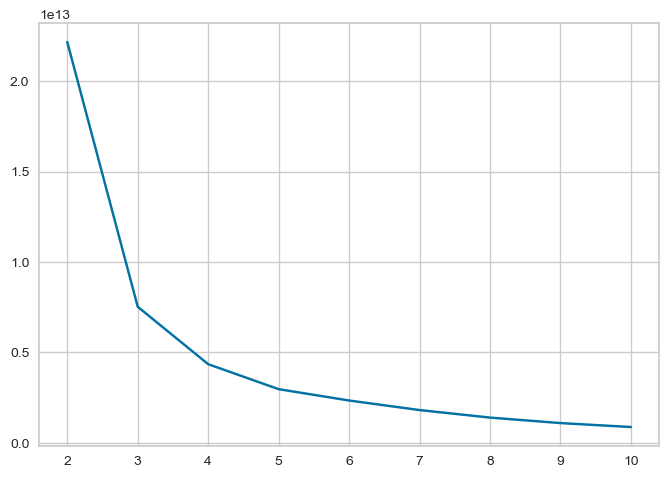

In [57]:
plt.plot(allclusters,distances)

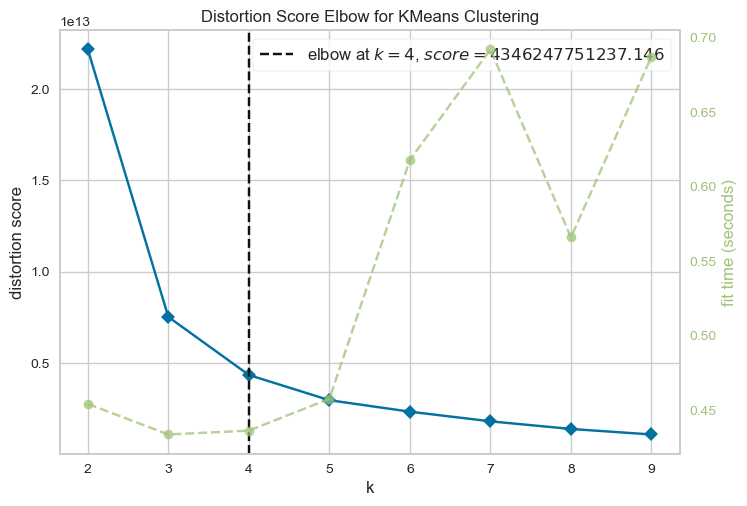

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(x) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure